<a href="https://colab.research.google.com/github/Thiru2208/Telco-Customer-Churn-ML-Coursework/blob/main/2425449_20241152_Thirusha_Kannathasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import libraries and load data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#Make platos look a bit nicer by default
sns.set(style = "whitegrid")

In [2]:
drive.mount('/content/drive')

#Load the Telco churn dataset
data = pd.read_csv("/content/drive/MyDrive/ML Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Exploratory Data Analysis (EDA**)

Basic structure: shape, info, summary

In [3]:
#Quick peek at the first few records
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Overall size of the dataset (rows, columns)
print("Shape of the dataset:", data.shape)

Shape of the dataset: (7043, 21)


In [5]:
print("\nDataFrame Info")
print(data.info())


DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

In [6]:
print("\nDescriptive stats (numeric columns)")
print(data.describe())


Descriptive stats (numeric columns)
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [7]:
# Count how many duplicate rows appear in the dataset
print("Duplicate rows in the dataset")
print(data.duplicated().sum())

Duplicate rows in the dataset
0


Check missing values

In [8]:
#Count how many missing values apperar in each column
print("\n Missing values per colums")
print(data.isnull().sum())


 Missing values per colums
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
print(data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
for column in data.columns:
    blank_mask = data[column].astype(str).str.strip() == ""
    num_blanks = blank_mask.sum()

    print(f"{column}: {num_blanks}")

    if num_blanks > 0:
        print(f"\nRows containing empty values in '{column}':")
        display(data[blank_mask])

customerID: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 11

Rows containing empty values in 'TotalCharges':


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Churn: 0


In [11]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = [c for c in data.columns if data[c].dtype == "O" and c != "customerID"]

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [12]:
# Checking unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
print()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].unique())
    print()
    print(data[col].value_counts())
    print()
    print()


Unique Values in Categorical Columns:

customerID: 7043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64


gender: 2 unique values
['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner: 2 unique values
['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents: 2 unique values
['No' 'Yes']

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService: 2 unique values
['No' 'Yes']

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines: 3 unique values
['No phone service' 'No' 'Yes']

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetServ

In [13]:
# Count of 'unknown' values in categorical columns
for col in categorical_cols:
    unknown_count = (data[col] == 'unknown').sum()
    total_count = len(data)
    print(f"\nProcessing column: {col}")
    print(f"  'unknown' values: {unknown_count} out of {total_count} ({(unknown_count / total_count) * 100:.2f}%)")


Processing column: customerID
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: gender
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Partner
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Dependents
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: PhoneService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: MultipleLines
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: InternetService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineSecurity
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineBackup
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: DeviceProtection
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: TechSupport
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingTV
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingMovies
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Contract


In [19]:
#Target Variable
# Count how many customers fall into each class (Yes/No)
churn_counts = data["Churn"].value_counts()
print("\n--- Churn counts ---")
print(churn_counts)


--- Churn counts ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [20]:
# Percentage for each class
churn_pct = churn_counts / len(data) * 100
print("\n--- Churn percentage ---")
print(churn_pct)


--- Churn percentage ---
Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


#**Data Visualization**

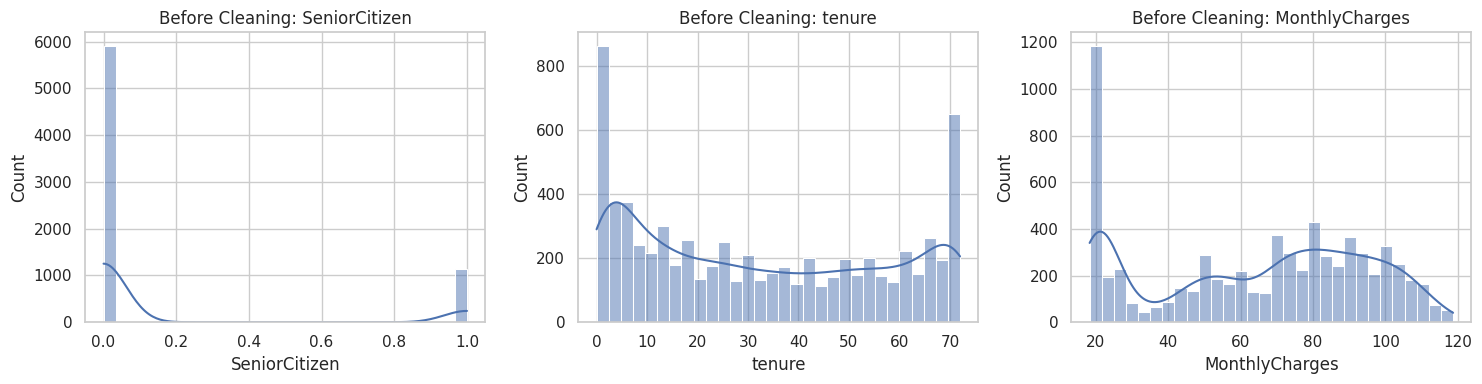

In [15]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Before Cleaning: {col}")
plt.tight_layout()
plt.show()


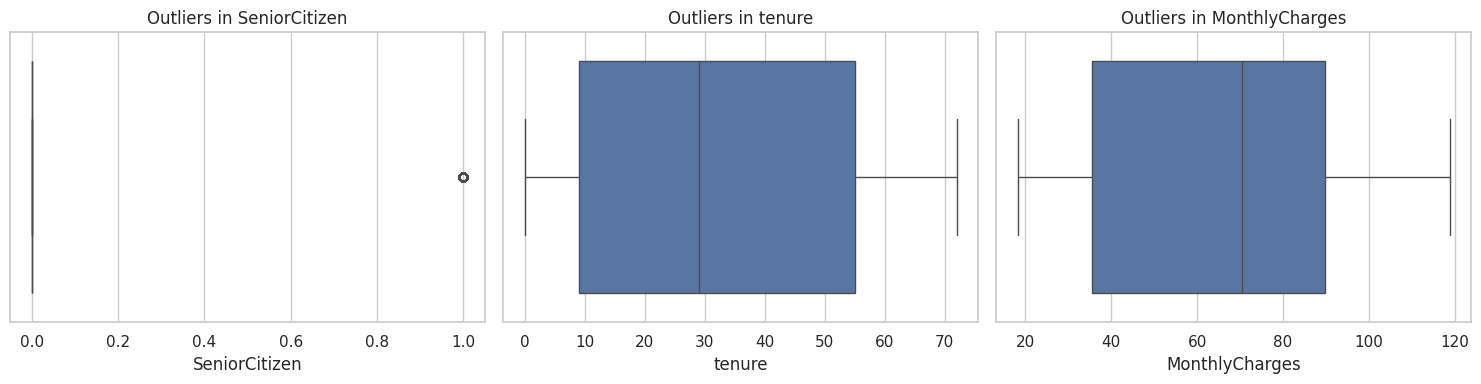

In [16]:
plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()


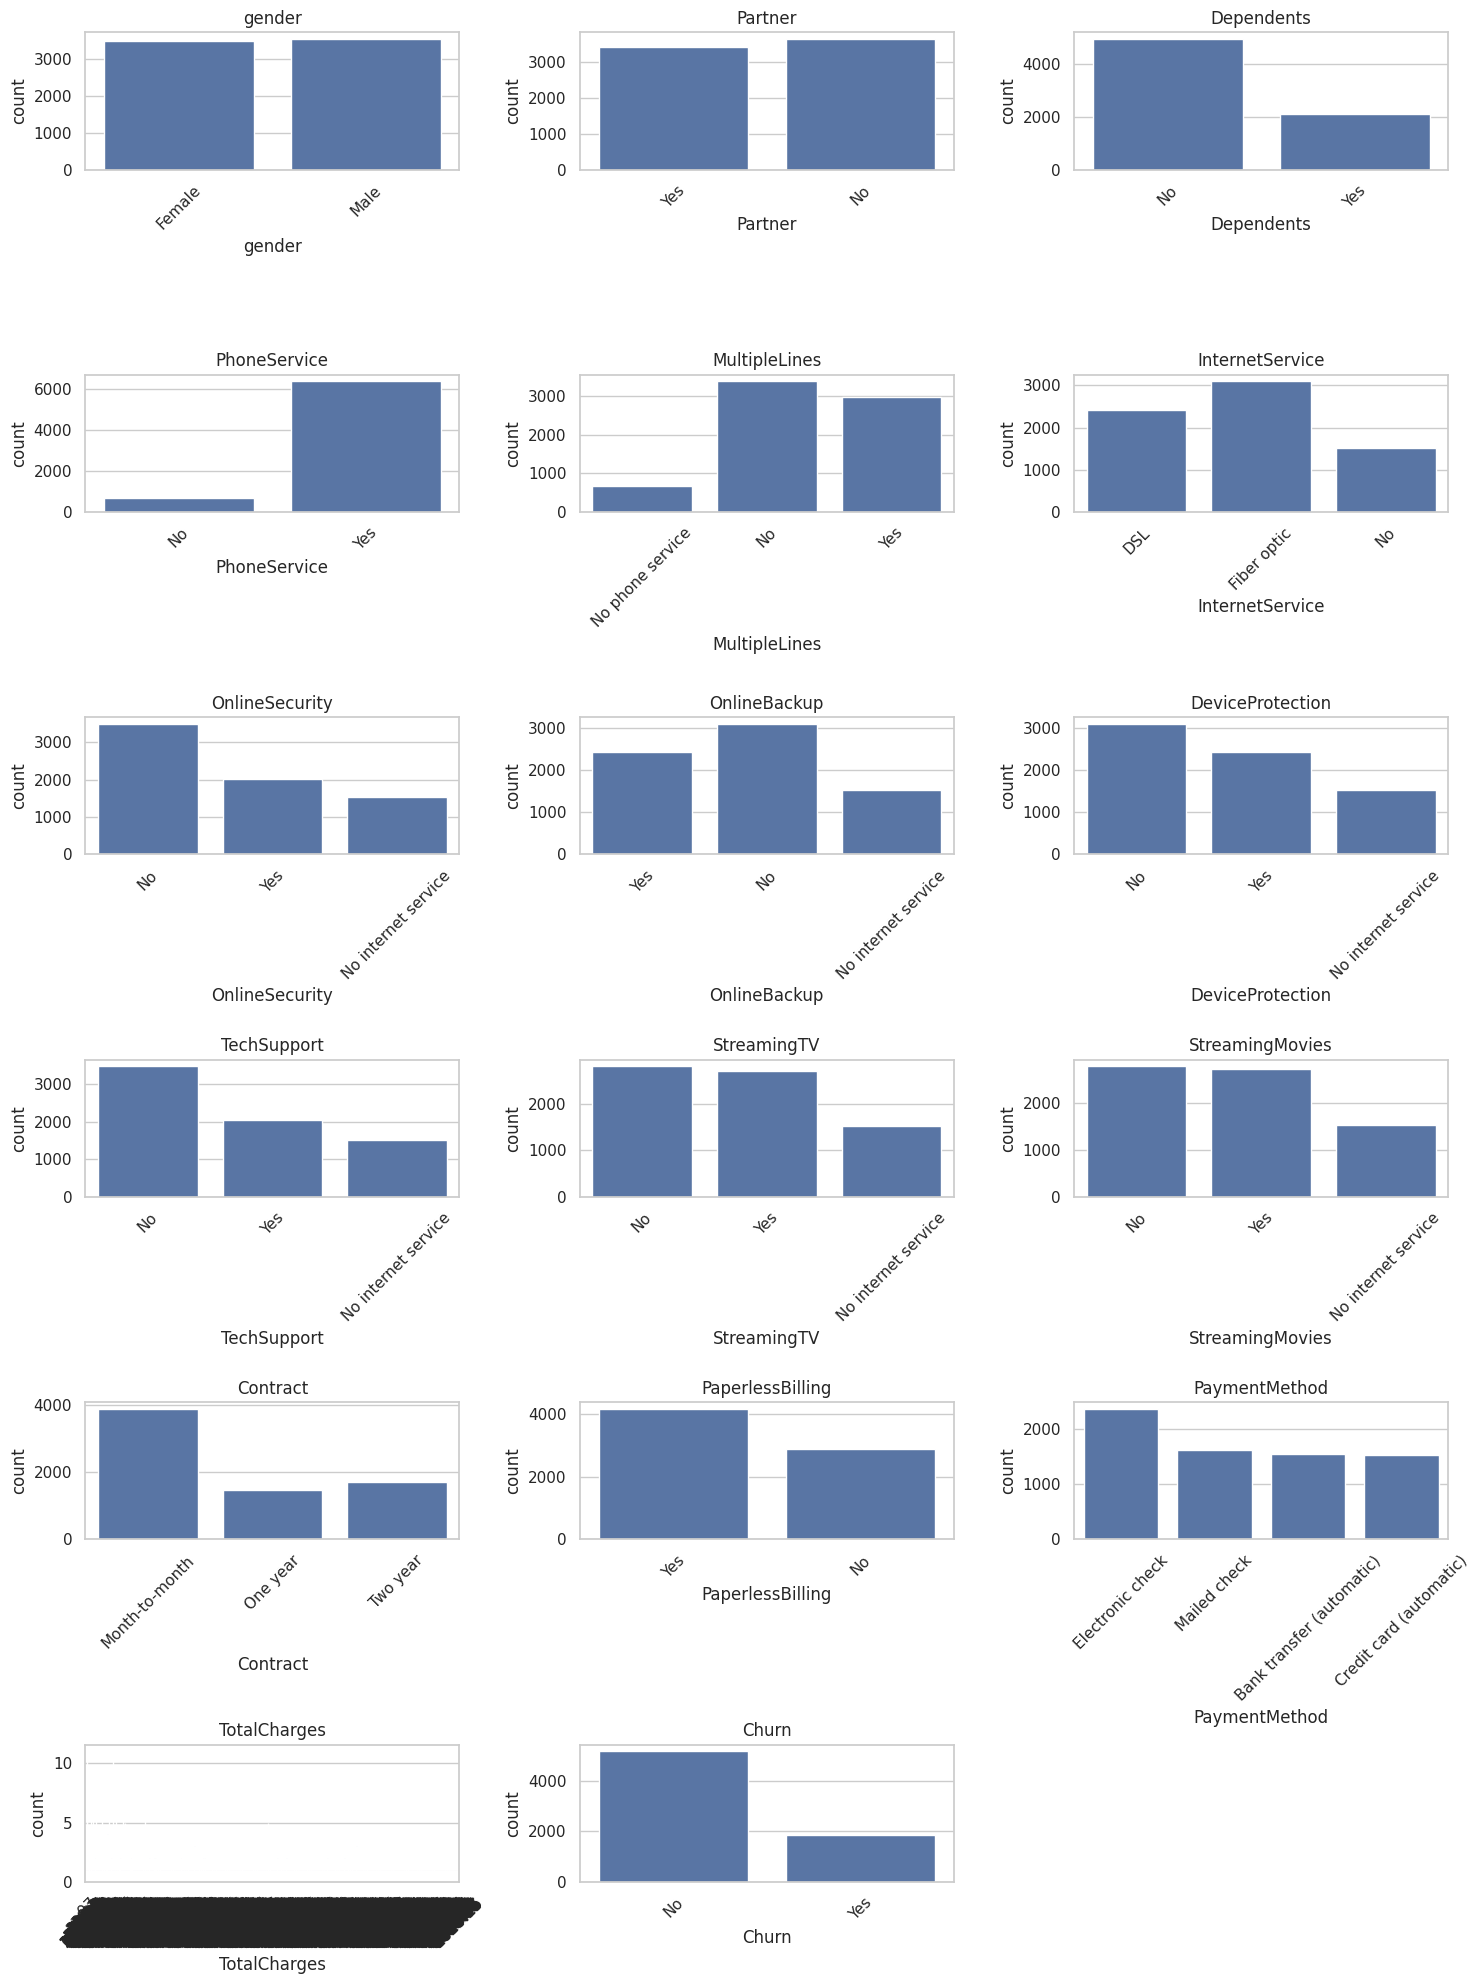

In [17]:
# Categorical Feature Distribution
categorical_cols = [c for c in data.columns if data[c].dtype == "O" and c != "customerID"]

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=col, data=data)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


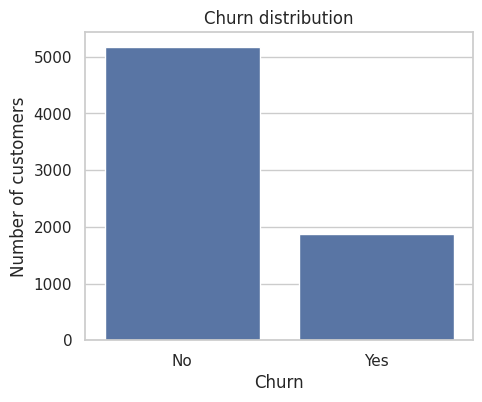

In [21]:
# Bar plot of churn variable
plt.figure(figsize=(5, 4))
sns.countplot(x="Churn", data=data)
plt.title("Churn distribution")
plt.xlabel("Churn")
plt.ylabel("Number of customers")
plt.show()

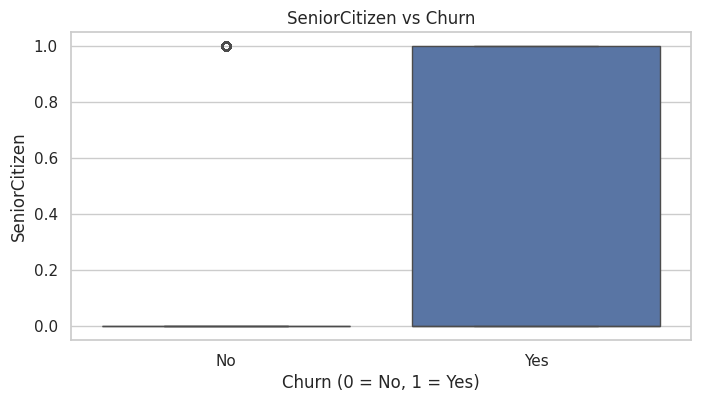

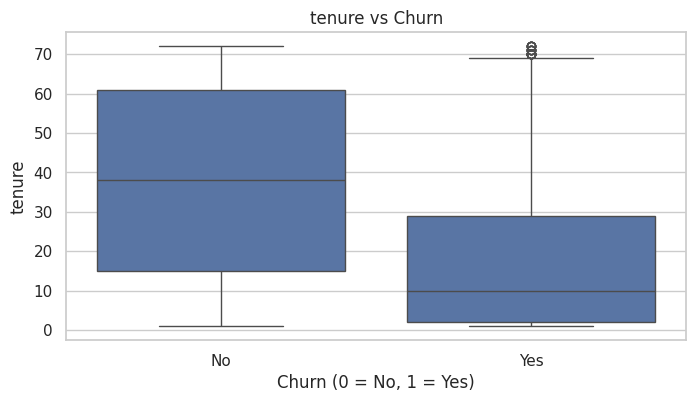

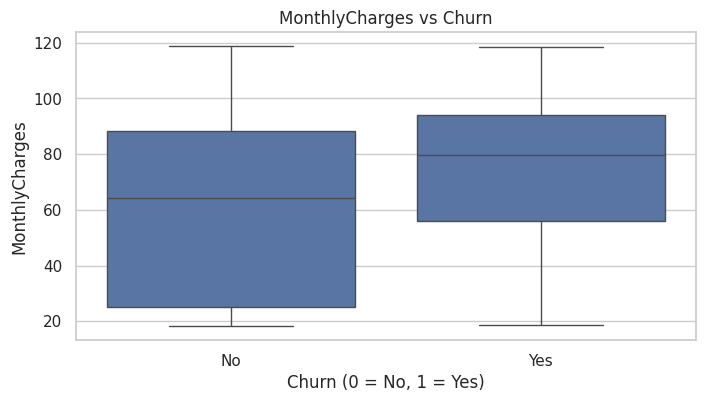

In [51]:
# Identify numerical columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

# Exclude the target variable 'Churn' from plotting
num_cols = [col for col in num_cols if col != 'Churn']

# Boxplots for each numerical column vs Churn
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data['Churn'], y=data[col])
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()



Churn percentages for: gender
Churn          No        Yes
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


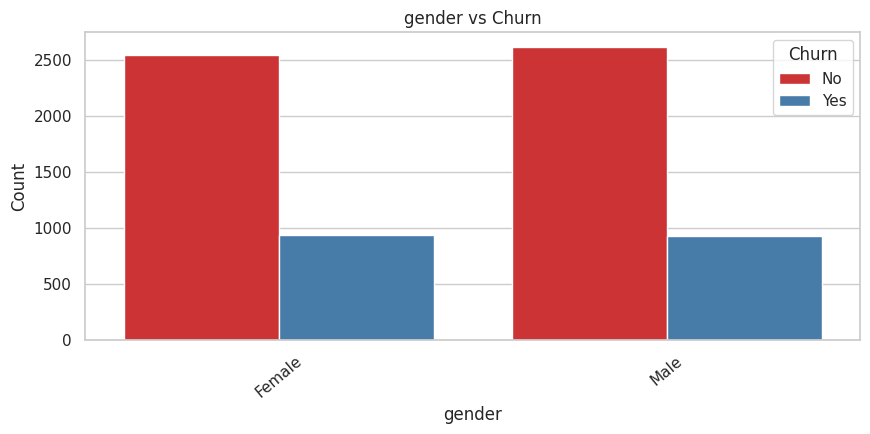


Churn percentages for: SeniorCitizen
Churn                 No        Yes
SeniorCitizen                      
0              76.349745  23.650255
1              58.318739  41.681261


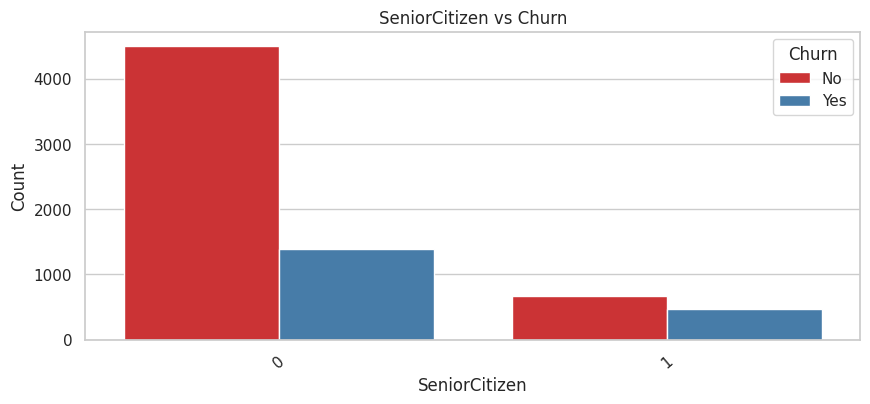


Churn percentages for: Partner
Churn           No        Yes
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065


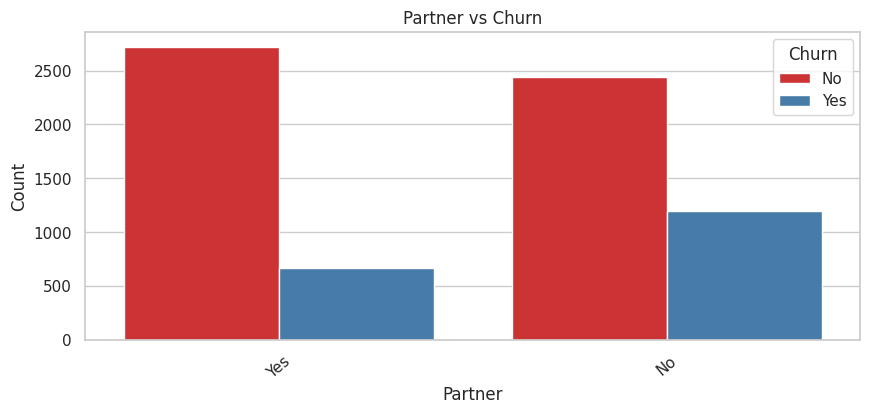


Churn percentages for: Dependents
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205


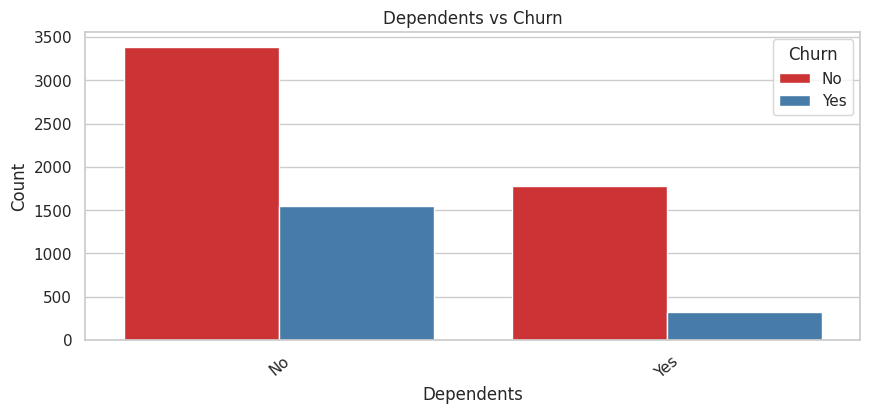


Churn percentages for: PhoneService
Churn                No        Yes
PhoneService                      
No            75.000000  25.000000
Yes           73.252519  26.747481


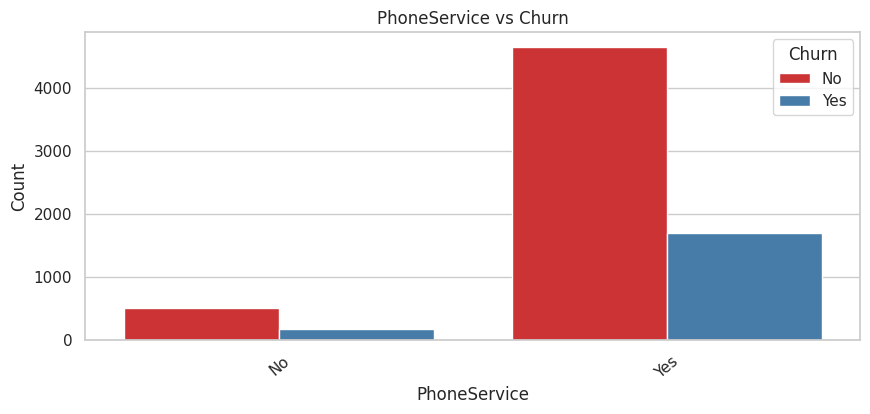


Churn percentages for: MultipleLines
Churn                    No        Yes
MultipleLines                         
No                74.918759  25.081241
No phone service  75.000000  25.000000
Yes               71.351534  28.648466


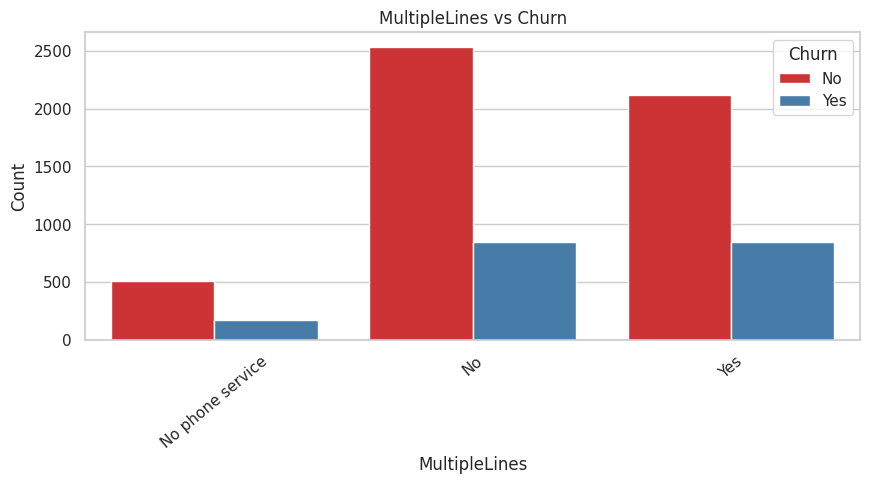


Churn percentages for: InternetService
Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


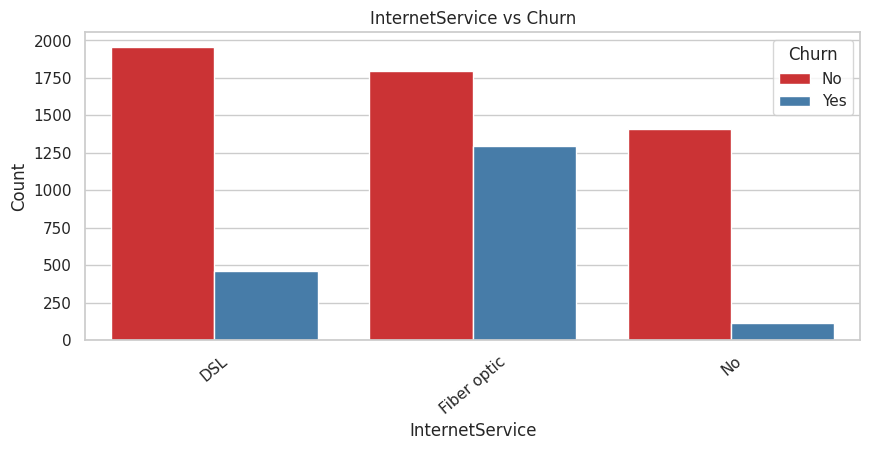


Churn percentages for: OnlineSecurity
Churn                       No        Yes
OnlineSecurity                           
No                   58.221333  41.778667
No internet service  92.565789   7.434211
Yes                  85.359801  14.640199


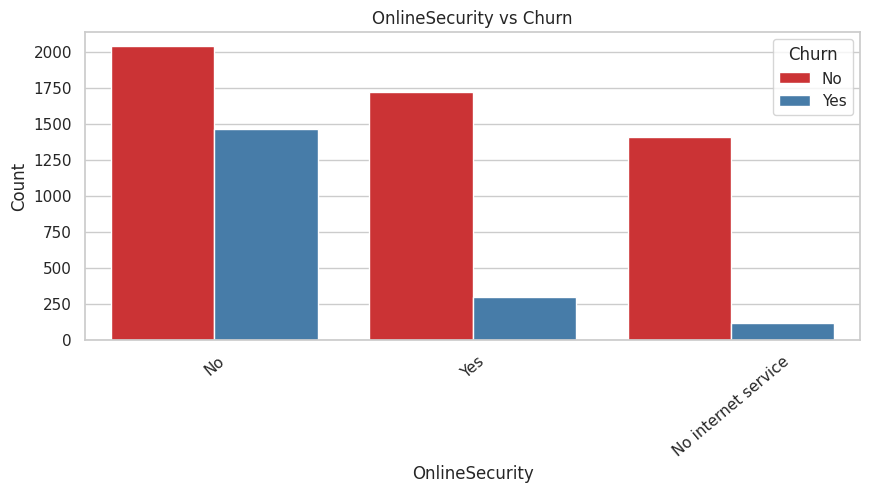


Churn percentages for: OnlineBackup
Churn                       No        Yes
OnlineBackup                             
No                   60.058309  39.941691
No internet service  92.565789   7.434211
Yes                  78.432990  21.567010


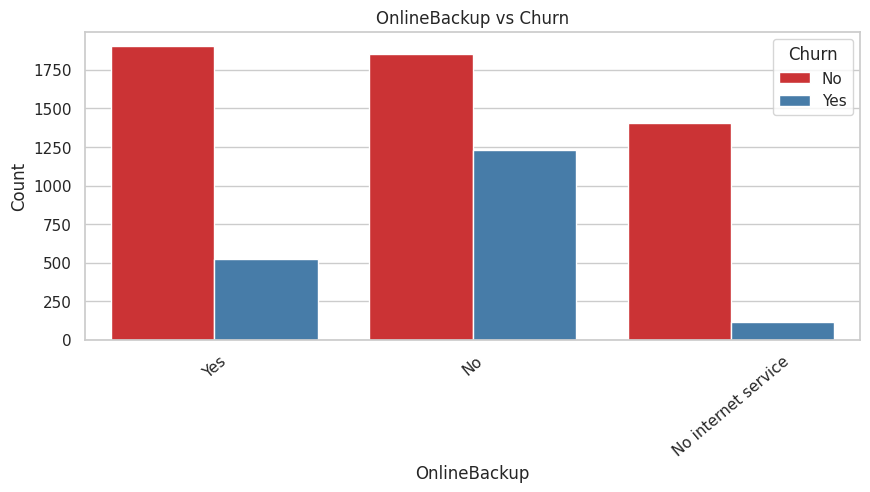


Churn percentages for: DeviceProtection
Churn                       No        Yes
DeviceProtection                         
No                   60.859729  39.140271
No internet service  92.565789   7.434211
Yes                  77.460711  22.539289


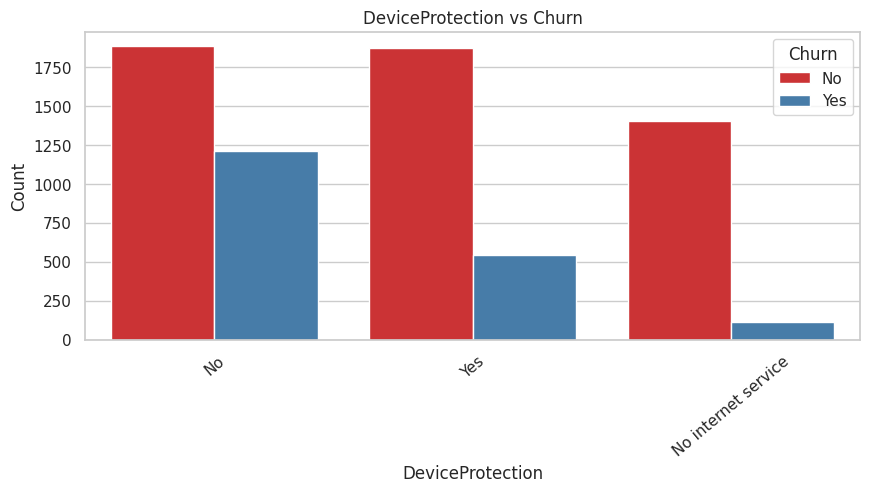


Churn percentages for: TechSupport
Churn                       No        Yes
TechSupport                              
No                   58.352535  41.647465
No internet service  92.565789   7.434211
Yes                  84.803922  15.196078


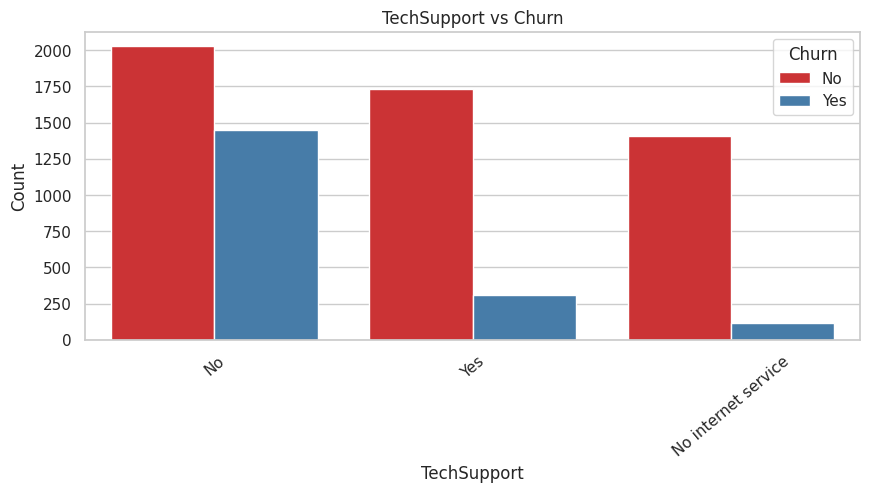


Churn percentages for: StreamingTV
Churn                       No        Yes
StreamingTV                              
No                   66.464934  33.535066
No internet service  92.565789   7.434211
Yes                  69.885313  30.114687


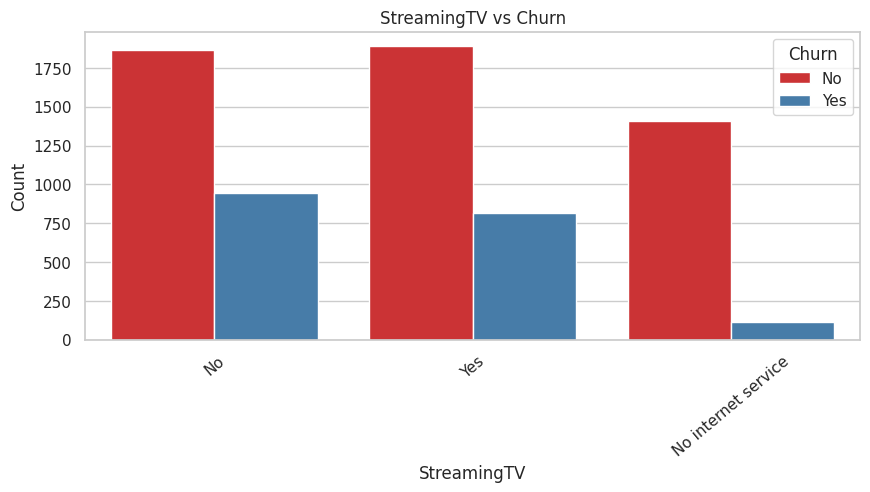


Churn percentages for: StreamingMovies
Churn                       No        Yes
StreamingMovies                          
No                   66.271125  33.728875
No internet service  92.565789   7.434211
Yes                  70.047602  29.952398


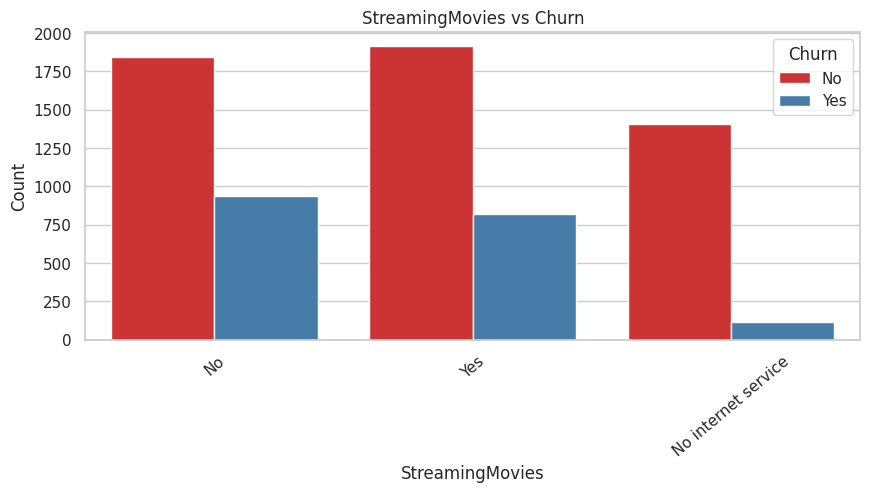


Churn percentages for: Contract
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


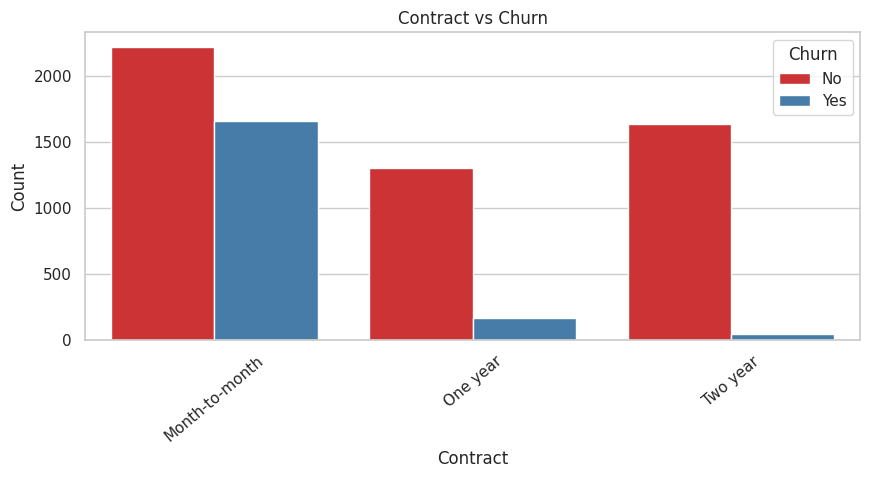


Churn percentages for: PaperlessBilling
Churn                    No        Yes
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251


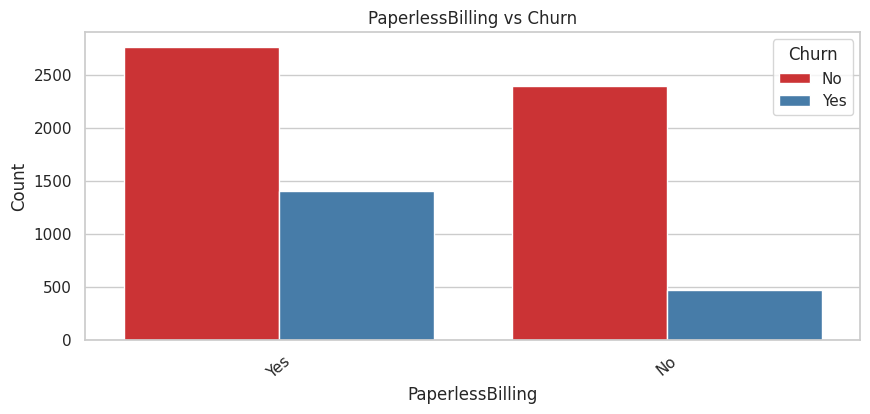


Churn percentages for: PaymentMethod
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


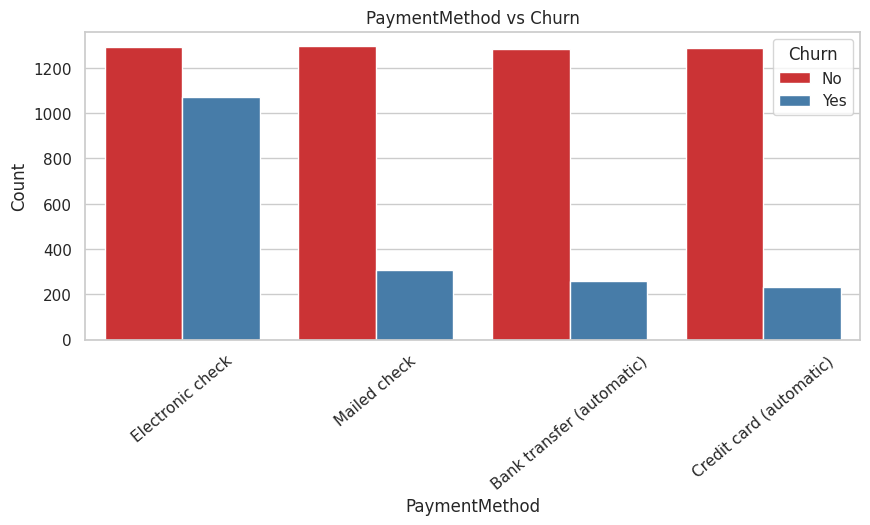

In [53]:
# Churn vs Categorical Features
for col in categorical_cols:
    # Create percentage table for each category
    churn_percent = pd.crosstab(data[col], data['Churn'], normalize='index') * 100
    print(f"\nChurn percentages for: {col}")
    print(churn_percent)

    # Plot count with hue = Churn
    plt.figure(figsize=(10,4))
    sns.countplot(x=data[col], hue=data['Churn'], palette='Set1')
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=40)
    plt.show()


In [18]:
#TotalCharges sometimes has spaces intead of real numbers
blank_total_charges = (data["TotalCharges"].astype(str).str.strip() == "").sum()
print("\nRows where TotalCharges is blank (as string):", blank_total_charges)


Rows where TotalCharges is blank (as string): 11


Simple correlation heatmap

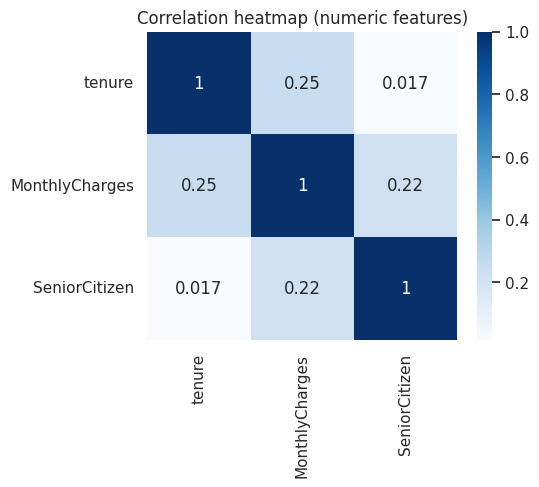

In [27]:
# Handle the new NaN values (for EDA, we can just drop them)
numeric_data = data[["tenure", "MonthlyCharges", "SeniorCitizen"]].dropna().copy()

plt.figure(figsize=(5, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap="Blues")
plt.title("Correlation heatmap (numeric features)")
plt.show()


Prepare dataframe for modelling

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

dataset = data.copy()

# Remove customerID bcz is not usefull for prediction
dataset.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors="coerce")

# Fill missing TotalCharges with median value
dataset["TotalCharges"] = dataset["TotalCharges"].fillna(dataset["TotalCharges"].median())


Handling missing values for blanks

In [29]:
data = data.loc[
    ~data.apply(lambda row: row.astype(str).str.strip().eq("").any(), axis=1)
].reset_index(drop=True)

print("Updated shape after filtering out blank rows:", data.shape)


Updated shape after filtering out blank rows: (7032, 21)


Encode target variable

In [30]:
labeler = LabelEncoder()
dataset["Churn"] = labeler.fit_transform(dataset["Churn"])

# Quick check
print(dataset["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [31]:
# Separate features and target
X = dataset.drop("Churn", axis=1)
y = dataset["Churn"]

# Convert categorical columns into dummy variables
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)


Shape after encoding: (7043, 30)


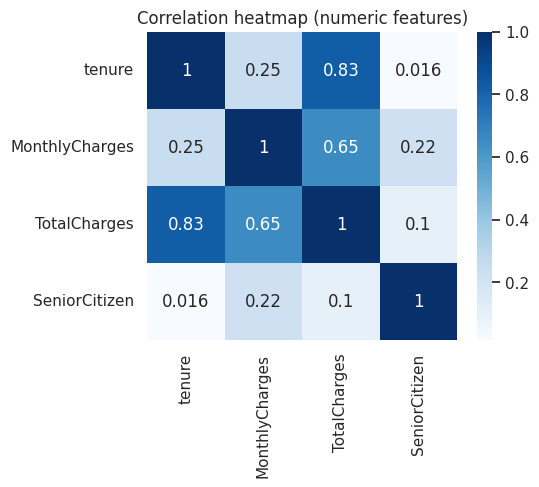

In [32]:
# Optional: handle the new NaN values (for EDA, we can just drop them)
numeric_data = data[["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]].dropna().copy()

plt.figure(figsize=(5, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap="Blues")
plt.title("Correlation heatmap (numeric features)")
plt.show()

In [33]:
!pip install imbalanced-learn

In [34]:
from imblearn.over_sampling import SMOTE
import pandas as pd # Ensure pandas is imported if not already globally available

# Make a copy
balanced_data = dataset.copy()

# Separate features and target
X = balanced_data.drop("Churn", axis=1)
y = balanced_data["Churn"]

# Convert categorical columns into dummy variables BEFORE SMOTE
X = pd.get_dummies(X, drop_first=True)

# Apply SMOTE BEFORE splitting
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("Original Class Distribution:")
print(y.value_counts())

print("\nAfter SMOTE:")
print(y_resampled.value_counts())

Original Class Distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64

After SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape    :", X_test.shape)

Training set shape: (5634, 30)
Test set shape    : (1409, 30)


Scaling for Neural Network

In [36]:
# Standardize the input features for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled test set shape    :", X_test_scaled.shape)

Scaled training set shape: (5634, 30)
Scaled test set shape    : (1409, 30)


Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

dt_clf = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [38]:
# Predictions on test data
y_pred_dt = dt_clf.predict(X_test)

In [39]:
# Evaluation metrics
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("=== Decision Tree - Test Performance ===")
print("Accuracy :", dt_acc)
print("Precision:", dt_prec)
print("Recall   :", dt_rec)
print("F1-score :", dt_f1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_dt))

=== Decision Tree - Test Performance ===
Accuracy : 0.794180269694819
Precision: 0.6296296296296297
Recall   : 0.5454545454545454
F1-score : 0.5845272206303725

Confusion Matrix:
[[915 120]
 [170 204]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.63      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Neural Network model
input_size = X_train_scaled.shape[1]

nn_model = Sequential([
    Input(shape=(input_size,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [41]:
# Train the model
history = nn_model.fit(
    X_train_scaled,
    y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

In [42]:
# Evaluate on test set
test_loss, test_acc = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print("Accuracy:", test_acc)

Accuracy: 0.773598313331604


In [43]:
# Convert probabilities to class labels
y_pred_prob = nn_model.predict(X_test_scaled)
y_pred_nn = (y_pred_prob >= 0.5).astype(int).ravel()

nn_prec = precision_score(y_test, y_pred_nn)
nn_rec = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)

print("Precision:", nn_prec)
print("Recall   :", nn_rec)
print("F1-score :", nn_f1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_nn))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision: 0.5964912280701754
Recall   : 0.45454545454545453
F1-score : 0.5159332321699545

Confusion Matrix:
[[920 115]
 [204 170]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.45      0.52       374

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



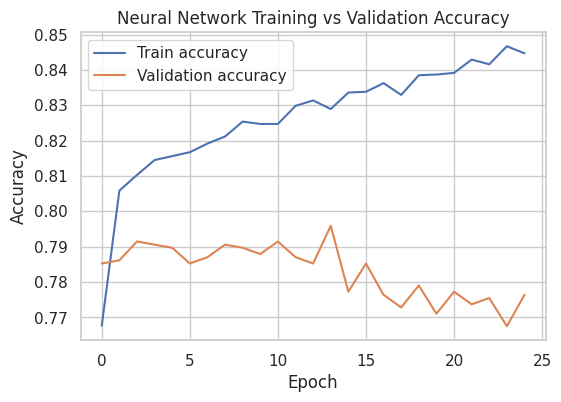

In [44]:
#plot NN training vs validation accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Neural Network Training vs Validation Accuracy')
plt.legend()
plt.show()

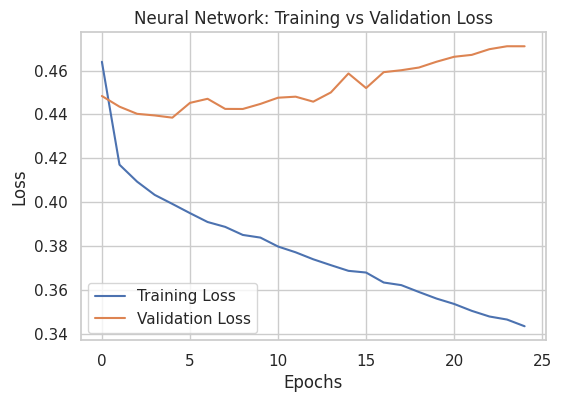

In [45]:
#Neural network training vs validation loss graph
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network: Training vs Validation Loss')
plt.legend()
plt.show()

In [46]:
#Comparison of the models
print(f"Decision Tree - Acc: {dt_acc:.4f}, Prec: {dt_prec:.4f}, Rec: {dt_rec:.4f}, F1: {dt_f1:.4f}")
print(f"Neural Net    - Acc: {test_acc:.4f}, Prec: {nn_prec:.4f}, Rec: {nn_rec:.4f}, F1: {nn_f1:.4f}")

Decision Tree - Acc: 0.7942, Prec: 0.6296, Rec: 0.5455, F1: 0.5845
Neural Net    - Acc: 0.7736, Prec: 0.5965, Rec: 0.4545, F1: 0.5159


In [47]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:

print(data.shape)

(7032, 21)


In [49]:
data.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
